In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa
import random as rn
from keras.layers import Dense
from keras import Input
#from keras.engine import Model
from keras.layers import Dense, TimeDistributed, Dropout, Bidirectional, GRU, BatchNormalization, Activation, LeakyReLU, LSTM, Flatten, RepeatVector, Permute, Multiply, Conv2D, MaxPooling2D
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers
from sklearn.preprocessing import MinMaxScaler

In [2]:
data_dir = 'C:/Users/USER/Desktop/spcup_2022/audiofile/'

In [46]:
X_mag = []
X_phase = []
Y = []
X_shape_list = []
categories = ["0","1","2","3","4"]
num_classes = len(categories)


for filename in os.listdir(f'C:/Users/USER/Desktop/spcup_2022/audiofile/'):
    audioname = f'C:/Users/USER/Desktop/spcup_2022/audiofile/{filename}'
    y, sr = librosa.load(audioname, duration=1, sr = 16000)  # 모두 1초까지만 자름
    stft = librosa.stft(y, n_fft=512, hop_length=384)  # 일반적으로 1/4 가량 겹치게 함
    # phase, mag 추출
    magnitude, phase = librosa.magphase(stft)
    # radian값으로 변환
    phase = np.angle(phase)
    # normalization_magnitude
    scaler = StandardScaler()
    scaler.fit(magnitude)
    magnitude = scaler.transform(magnitude)
    # normalization_phase
    scaler = StandardScaler()
    scaler.fit(phase)
    phase = scaler.transform(phase)
    
    X_mag.append(magnitude)
    X_phase.append(phase)
    

for idex, category in enumerate(categories):
    label = [0 for i in range(num_classes)]
    label[idex] = 1
    for j in range(1000):
        Y.append(label)

X_mag = np.array(X_mag)
X_phase = np.array(X_phase)
Y = np.array(Y)
print(X_mag.shape)
print(X_phase.shape)
print(Y.shape)

(5000, 257, 42)
(5000, 257, 42)
(5000, 5)


In [ ]:
X[0].shape, X[1].shape, X[318].shape

In [47]:
X_mag_train = np.concatenate((X_mag[0:800],X_mag[1000:1800],X_mag[2000:2800],X_mag[3000:3800],X_mag[4000:4800]), axis = 0)
X_mag_test = np.concatenate((X_mag[800:1000],X_mag[1800:2000],X_mag[2800:3000],X_mag[3800:4000],X_mag[4800:5000]), axis = 0)
Y_mag_train = np.concatenate((Y[0:800],Y[1000:1800],Y[2000:2800],Y[3000:3800],Y[4000:4800]), axis = 0)
Y_mag_test = np.concatenate((Y[800:1000],Y[1800:2000],Y[2800:3000],Y[3800:4000],Y[4800:5000]), axis = 0)

X_phase_train = np.concatenate((X_phase[0:800],X_phase[1000:1800],X_phase[2000:2800],X_phase[3000:3800],X_phase[4000:4800]), axis = 0)
X_phase_test = np.concatenate((X_phase[800:1000],X_phase[1800:2000],X_phase[2800:3000],X_phase[3800:4000],X_phase[4800:5000]), axis = 0)
Y_phase_train = np.concatenate((Y[0:800],Y[1000:1800],Y[2000:2800],Y[3000:3800],Y[4000:4800]), axis = 0)
Y_phase_test = np.concatenate((Y[800:1000],Y[1800:2000],Y[2800:3000],Y[3800:4000],Y[4800:5000]), axis = 0)

print('X_mag')
print(X_mag_train.shape)
print(X_mag_test.shape)
print(Y_mag_train.shape)
print(Y_mag_test.shape)
print('X_phase')
print(X_phase_train.shape)
print(X_phase_test.shape)
print(Y_phase_train.shape)
print(Y_phase_test.shape)

X_mag
(4000, 257, 42)
(1000, 257, 42)
(4000, 5)
(1000, 5)
X_phase
(4000, 257, 42)
(1000, 257, 42)
(4000, 5)
(1000, 5)


In [48]:
# CNN 모델에 들어가려면 4차원으로 바꿔줘야함
X_mag_train = X_mag_train.reshape(-1,257,42,1)
X_mag_test = X_mag_test.reshape(-1,257,42,1)

X_phase_train = X_phase_train.reshape(-1,257,42,1)
X_phase_test = X_phase_test.reshape(-1,257,42,1)

In [49]:
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPooling2D

In [50]:
#93% 모델
model_mag = Sequential()
model_mag.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(257, 42, 1)))
model_mag.add(layers.MaxPooling2D((2, 2)))
model_mag.add(layers.Dense(32, activation='relu'))
model_mag.add(Flatten())
model_mag.add(layers.Dense(32, activation='relu'))
model_mag.add(layers.Dense(5, activation='softmax'))


model_phase = Sequential()
model_phase.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(257, 42, 1)))
model_phase.add(layers.MaxPooling2D((2, 2)))
model_phase.add(layers.Dense(32, activation='relu'))
model_phase.add(Flatten())
model_phase.add(layers.Dense(32, activation='relu'))
model_phase.add(layers.Dense(5, activation='softmax'))


In [23]:
model_phase = Sequential()
model_phase.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(257, 42, 1)))
model_phase.add(layers.MaxPooling2D((2, 2)))
model_phase.add(layers.Dense(32, activation='relu'))
model_phase.add(Flatten())
model_phase.add(layers.Dense(32, activation='relu'))
model_phase.add(layers.Dense(5, activation='softmax'))

In [37]:
# 모델 컴파일
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3, mode = 'auto',restore_best_weights=True)
model_mag.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
              early_stopping=)

In [24]:
model_phase.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
classifier_mag = model_mag.fit(X_mag_train,
                    Y_mag_train,
                    epochs=10,
                    batch_size=64,
                    validation_split = 0.2)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\USER\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\engine\training.py", line 817, in train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 439, in update_state
        self.build(y_pred, y_true)
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 359, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(y_pred, self._get_metric_objects,
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 485, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 485, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 504, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\metrics.py", line 3785, in get
        return deserialize(str(identifier))
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\metrics.py", line 3741, in deserialize
        return deserialize_keras_object(
    File "C:\Users\USER\anaconda3\lib\site-packages\keras\utils\generic_utils.py", line 708, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: val_acc. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [25]:
classifier_phase = model_phase.fit(X_phase_train,
                    Y_phase_train,
                    epochs=20,
                    batch_size=64)

Epoch 1/20
63/63 [==============================] - 30s 472ms/step - loss: 1.8177 - accuracy: 0.3205
Epoch 2/20
63/63 [==============================] - 29s 460ms/step - loss: 1.0107 - accuracy: 0.5320
Epoch 3/20
63/63 [==============================] - 29s 456ms/step - loss: 0.7651 - accuracy: 0.6440
Epoch 4/20
63/63 [==============================] - 29s 457ms/step - loss: 0.6863 - accuracy: 0.6770
Epoch 5/20
63/63 [==============================] - 29s 463ms/step - loss: 0.5996 - accuracy: 0.7753
Epoch 6/20
63/63 [==============================] - 30s 475ms/step - loss: 0.5228 - accuracy: 0.8155
Epoch 7/20
63/63 [==============================] - 32s 506ms/step - loss: 0.4345 - accuracy: 0.8553
Epoch 8/20
63/63 [==============================] - 29s 461ms/step - loss: 0.3383 - accuracy: 0.9043
Epoch 9/20
63/63 [==============================] - 31s 493ms/step - loss: 0.2188 - accuracy: 0.9513
Epoch 10/20
63/63 [==============================] - 29s 462ms/step - loss: 0.1406 - accura

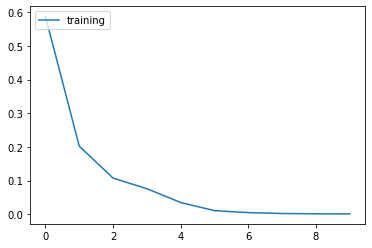

In [18]:
plt.plot(classifier_mag.history['loss'])
plt.plot(classifier.history['val_loss'])

plt.legend(['loss', 'val_loss'], loc = 'upper left')
plt.show()

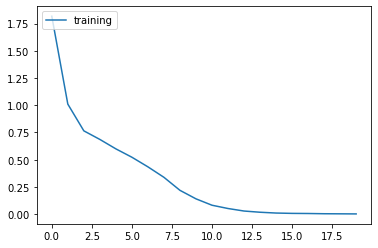

In [26]:
plt.plot(classifier_phase.history['loss'])
#plt.plot(classifier.history['accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [19]:
test_loss, test_acc = model_mag.evaluate(X_mag_test,  Y_mag_test, verbose=2)
print('테스트 정확도:', test_acc)

32/32 - 3s - loss: 0.2139 - accuracy: 0.9360 - 3s/epoch - 79ms/step
테스트 정확도: 0.9359999895095825


In [31]:
test_loss, test_acc = model_phase.evaluate(X_phase_test,  Y_phase_test, verbose=2)
print('테스트 정확도:', test_acc)

32/32 - 2s - loss: 0.9130 - accuracy: 0.7330 - 2s/epoch - 73ms/step
테스트 정확도: 0.7329999804496765


In [45]:
print(Y_phase_test[Y_phase_test[:,3]==0].shape)

(800, 5)


In [32]:
prediction = model.predict(X_phase_test)

In [33]:
predicted_classes = np.argmax(prediction, axis = 1)
print(predicted_classes)

[2 2 2 2 2 0 2 0 0 2 0 0 2 0 2 2 0 2 0 0 2 0 0 2 2 2 0 0 0 0 2 2 2 2 2 2 2
 0 0 2 0 2 2 2 0 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 0 0 0 2 2 0 2 2 0 0
 0 2 2 0 0 0 2 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 2 0 0 0 0 2 0 2 0 2 2 2 0 2
 0 0 0 2 2 0 2 2 2 2 0 2 2 2 2 0 0 2 2 2 0 0 0 0 2 2 0 0 2 0 2 2 0 2 2 0 0
 0 2 2 0 0 0 2 2 2 2 0 0 0 2 2 0 2 2 0 2 0 2 0 2 2 2 2 2 0 2 0 2 2 0 0 0 2
 2 2 2 0 2 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 2 0 2 0 2 0 2 2 0 2 2 0 0 2
 2 0 2 2 2 2 2 0 0 2 2 0 0 0 0 0 2 2 0 2 2 2 2 2 2 0 2 2 0 0 0 2 0 0 0 0 0
 2 2 2 2 2 2 2 0 0 0 2 2 2 2 0 2 0 0 0 2 0 0 0 2 2 2 2 0 2 2 0 2 2 2 0 2 2
 0 2 0 2 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 0 0 0 2 2 2 2 2 2 2 2 0 0
 0 0 2 2 2 0 0 2 0 2 2 0 2 2 2 2 2 0 2 2 2 0 2 0 2 0 2 2 2 2 0 0 0 2 2 0 2
 2 0 0 0 2 2 0 0 2 2 0 2 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 0
 2 2 0 2 0 2 2 2 2 2 2 2 2 0 0 0 0 2 0 0 2 0 0 2 2 2 2 2 2 2 2 0 2 2 0 2 2
 0 2 2 0 0 2 2 2 0 0 2 0 2 2 0 0 2 2 2 0 2 0 0 2 0 2 2 0 0 2 2 0 2 2 0 2 0
 0 0 0 0 2 2 2 0 2 0 0 0 

In [30]:
labels = np.argmax(Y_phase_test, axis=1)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [ ]:
labels.shape, predicted_classes.shape

In [ ]:
print(np.where(predicted_classes[0] != labels[0]))

In [ ]:
index = np.where(predicted_classes != labels)
print(index)

In [ ]:
len(index[0])

In [ ]:
index[0][0]

In [ ]:
X_filename = []
for filename in os.listdir(f'C:/Users/USER/Desktop/spcup_2022/audiofile/'):
    audioname = f'C:/Users/USER/Desktop/spcup_2022/audiofile/{filename}'
    X_filename.append(audioname)
X_filename = np.array(X_filename)

In [ ]:
len(X_filename)

In [ ]:
X_test_filename = np.concatenate((X_filename[800:1000],X_filename[1800:2000],X_filename[2800:3000],X_filename[3800:4000],X_filename[4800:5000]), axis = 0)

In [ ]:
len(X_test_filename)

In [ ]:
X_test_filename[0]

In [ ]:
# 잘못 예측한 오디오 파일들 
wrong_predictions = []

for i in range(len(index[0])):
    wrong_predictions.append(X_test_filename[index[0][i]])
    print(X_test_filename[index[0][i]])
    
print(len(wrong_predictions))

In [ ]:
# 잘못 예측한거 plot
for audio in wrong_predictions:
    y, sr = librosa.load(audio, duration=1)  # 모두 1초까지만 자름
    stft = np.abs(librosa.stft(y, n_fft=512, hop_length=384))   # 일반적으로 1/4 가량 겹치게 함
    spectogram = np.abs(stft)
    plt.figure(figsize=(10,5))
    plt.title(audio)
    plt.plot(spectogram) 

In [ ]:
# 잘못 예측한 오디오 파일들 모은 폴더 생성
import shutil
import os
 
file_source = 'C:/Users/USER/Desktop/spcup_2022/audiofile/'
file_destination = 'C:/Users/USER/Desktop/wrong_prediction'
 
get_files = os.listdir(file_source)
 

for i in range(len(wrong_predictions)):
    print(wrong_predictions[i][43:])
    for g in get_files:
        if g == wrong_predictions[i][43:]:
            shutil.move(file_source + g, file_destination)